In [ ]:
!sudo apt install tesseract-ocr -y
!sudo apt install libtesseract-dev -y
!sudo apt-get install poppler-utils -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (18.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
!pip install langchain unstructured[all-docs] pydantic lxml openai chromadb tiktoken opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.7/274.7 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 60.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB

In [ ]:
pip install --upgrade langchain


In [ ]:
pip install langchain_community


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.2 MB/s eta 0:00:00


In [ ]:
import os
import uuid
import base64
from IPython import display
from unstructured.partition.pdf import partition_pdf
from langchain.chat_models import ChatOpenAI
from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.schema.messages import HumanMessage, SystemMessage
from langchain.schema.document import Document
from langchain.vectorstores import FAISS
from langchain.retrievers.multi_vector import MultiVectorRetriever

In [ ]:
from google.colab import userdata
openai_api_key = userdata.get('OPEN_API_KEY')

In [ ]:
output_path = "./images"

In [ ]:
# Get elements
raw_pdf_elements = partition_pdf(
    filename="/content/badminton.pdf",
    extract_images_in_pdf=True,
    infer_table_structure=False,
    chunking_strategy="by_title",
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
    extract_image_block_output_dir=output_path,
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

In [ ]:
# Get text summaries and table summaries
text_elements = []
text_summaries = []

summary_prompt = """
Summarize the following {element_type}:
{element}
"""
summary_chain = LLMChain(
    llm=ChatOpenAI(model="gpt-3.5-turbo", openai_api_key = openai_api_key, max_tokens=1024),
    prompt=PromptTemplate.from_template(summary_prompt)
)

for e in raw_pdf_elements:
    if 'CompositeElement' in repr(e):
        text_elements.append(e.text)
        summary = summary_chain.run({'element_type': 'text', 'element': e})
        text_summaries.append(summary)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


In [ ]:
# Get image summaries
image_elements = []
image_summaries = []

def encode_image(image_path):
    with open(image_path, "rb") as f:
        return base64.b64encode(f.read()).decode('utf-8')

def summarize_image(encoded_image):
    prompt = [
        SystemMessage(content="You are a bot that is good at analyzing images"),
        HumanMessage(content=[
            {
                "type": "text",
                "text": "Describe the contents of this image."
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{encoded_image}"
                },
            },
        ])
    ]
    response = ChatOpenAI(model="gpt-4o", openai_api_key=openai_api_key, max_tokens=1024).invoke(prompt)
    return response.content

for i in os.listdir(output_path):
    if i.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(output_path, i)
        encoded_image = encode_image(image_path)
        image_elements.append(encoded_image)
        summary = summarize_image(encoded_image)
        image_summaries.append(summary)

In [ ]:
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 29.4 MB/s eta 0:00:00


In [ ]:
pip install langchain faiss-cpu


In [ ]:
import uuid
from langchain.vectorstores import FAISS
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.schema import Document


In [ ]:
pdf_source = "/content/badminton.pdf"  # Original source of information
documents = []
retrieve_contents = []

# Create documents for text elements
for e, s in zip(text_elements, text_summaries):
    i = str(uuid.uuid4())
    doc = Document(
        page_content=s,
        metadata={
            'id': i,
            'type': 'text',
            'original_content': e,
            'source': pdf_source  # Original source of text content
        }
    )
    retrieve_contents.append((i, e))
    documents.append(doc)

# Create documents for image elements
for e, s in zip(image_elements, image_summaries):
    i = str(uuid.uuid4())
    doc = Document(
        page_content=s,
        metadata={
            'id': i,
            'type': 'image',
            'original_content': e,
            'source': pdf_source  # Original source of image content
        }
    )
    retrieve_contents.append((i, s))
    documents.append(doc)

In [ ]:
# Create FAISS vector store from documents
vectorstore = FAISS.from_documents(documents=documents, embedding=OpenAIEmbeddings(openai_api_key=openai_api_key))
vectorstore.save_local("faiss_index")

# Load FAISS vector store
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)
db = FAISS.load_local("faiss_index", embeddings, allow_dangerous_deserialization=True)


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [ ]:
# Template for answering questions with source tracking
prompt_template = """
You are a bot answering questions about the game badminton.
Answer the question based only on the following context, which can include text, images and tables:
{context}
Question: {question}
Don't answer if you are not sure and decline to answer and say "Sorry, I don't have much information about it."
Just return the helpful answer in as much as detailed possible.
Answer:
"""

In [ ]:
# Create QA chain for answering questions
qa_chain = LLMChain(
    llm=ChatOpenAI(model="gpt-4", openai_api_key=openai_api_key, max_tokens=1024),
    prompt=PromptTemplate.from_template(prompt_template)
)


In [ ]:
# Function to answer questions based on context
def answer(question):
    relevant_docs = db.similarity_search(question)
    top_contexts = []  # List to store top three relevant contexts as tuples (index, context)
    sources = []
    relevant_images = []

    # Retrieve top three relevant contexts
    for idx, d in enumerate(relevant_docs):
        if idx >= 3:  # Limit to top three relevant documents
            break
        source_info = f"Source ID: {d.metadata['id']}, Type: {d.metadata['type']}, Source: {d.metadata.get('source', 'Unknown')}"
        if d.metadata['type'] == 'text':
            context = '[text]' + d.metadata['original_content'] + "\n" + source_info + "\n"
        elif d.metadata['type'] == 'image':
            context = '[image]' + d.page_content + "\n" + source_info + "\n"
            relevant_images.append(d.metadata['original_content'])  # Append image content

        top_contexts.append((idx + 1, context))  # Adding 1 to idx to start numbering from 1
        sources.append(source_info)

    # Combine top contexts into a single context for QA
    combined_context = "\n\n".join([context for _, context in top_contexts])

    # Run QA chain to get the answer directly
    result = qa_chain.run({'context': combined_context, 'question': question})
    return result, sources, relevant_images, top_contexts

In [ ]:
# Example usage:
result, sources, relevant_images, top_contexts= answer("explain the sequence of a stroke")
print("topcontexts:")
for idx, context in top_contexts:
    print(f"Context {idx}:")
    print(context)

print("\nSources:", sources)


topcontexts:
Context 1:
[text]THE STROKE CYCLE

Ready  Prepare  Hit  ROUNDHEAD  A D  E  H  R  O  V  E  R  H  E  A  D  D  S  I  D  N  E  A R M  A  H  K  C  A  B 

All strokes are made up of the following cycle:

Ready  Recover  Prepare  Hit 

Figure 2.20 below illustrates the full range of strokes.

N.B. Ensure feeders cannot be hit in the face by a returning shuttle.

ROUNDHEAD  A D  E  H  R  O  O V E  V  E  R  H  E  A  D  D  D  S  I  D  N  N  E  M R A E D  A R M  A  A  H  H  K  I  E  S  C  R  A  O  B  F  D E R A R M  U  N  D  N  E  U  RARM  Figure 2.20 

Task 10

Activity Use racket feeder for longer hit from the rearcourt; let the player recover to base before feeding next shuttle (see Figure 2.19). Player hits to specified targets, e.g. smash to mid court.

R F •  P Base • 

Figure 2.19 Key: P = player RF = racket feed

a 9.

ROYAL NAVY

1 3 

THE STROKES AS MOVES IN THE GAME

In this section emphasis is put on the use of strokes as opening moves (serve/return of serve) and as subse

In [ ]:
print("Summary of Top Contexts:\n")
print(result)


Summary of Top Contexts:

The sequence of a stroke in badminton consists of four main stages: Ready, Recover, Prepare, and Hit. 

1. Ready: This is the initial stage where the player positions themselves in a ready stance, awaiting the arrival of the shuttle. 

2. Recover: After a stroke has been executed, the player must immediately shift into a recovery mode. This involves returning to the base or center of the court to prepare for the next shuttle.

3. Prepare: In this phase, the player anticipates the shuttle's trajectory and prepares to execute the stroke. This could mean adjusting their grip on the racket, positioning their body correctly, and preparing to swing the racket.

4. Hit: The final stage of the stroke cycle is the actual hitting of the shuttle. The player swings their racket to make contact with the shuttle, directing it towards the intended area on the opponent's side of the court. 

These four stages are continuously cycled throughout a game of badminton, with each s

In [ ]:
relevant_images[0]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAJiBYQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD0yiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAo

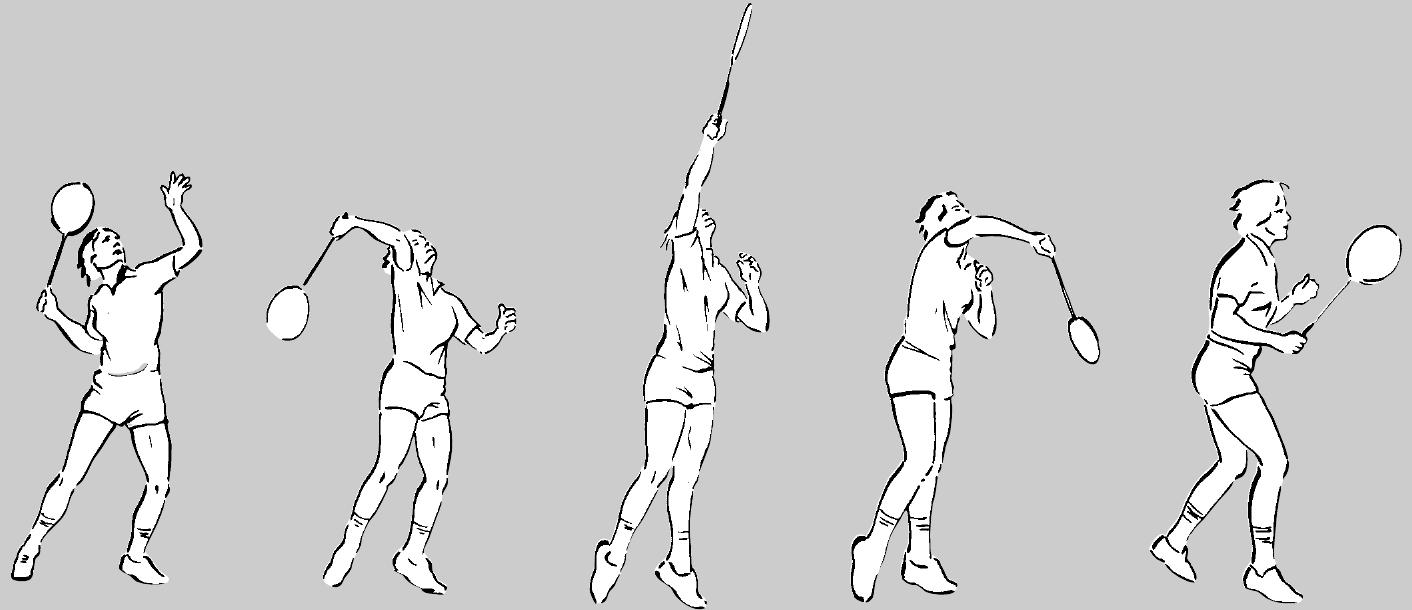

In [ ]:
display.display(display.Image(base64.b64decode(relevant_images[0])))